In [3]:
# !wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images-square.zip!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-data.zip
# !unzip ut-zap50k-images-square.zip
# !unzip ut-zap50k-data.zip

#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
%matplotlib inline
#from tqdm import tqdm_notebook
import os
from glob import glob
from os.path import isdir,abspath,join
from os import listdir




import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
today = datetime.today()


summary_file ='train_test_val_Feb-06-2020.pkl'
#df.to_pickle(summary_file)
#df = pd.read_pickle(summary_file)

json_summary_file ='train_test_val_Feb-06-2020.json'
#df.to_json(summary_file)
df = pd.read_json(json_summary_file)



## simplified dataset....

Index(  
[u'Boots', 
  
  u'Brand', u'CID', 
  
  u'Category', u'CategoryDir', 
  
  u'Filename',
  
  u'Gender',
  
  u'Shoes', u'Sneakers', 
  
  u'SubCategory', 
       u'image_features',
       u'path', u'path_and_file',
       u'test', u'train',
       u'validate',
       u'validation'],
      dtype='object')


In [6]:
# # save the simple file
# summary_file ='categories_with_features_Feb-05-2020.pkl'
# df.to_pickle(summary_file)

# summary_file ='categories_with_features_Feb-05-2020.json'
# df.to_json(summary_file)
df.head(25)
df2.shape
df.shape

(34278, 12)

# I have my three categories.. lets grab the images and validate

In [ ]:
print(os.getcwd())


df['Filename']

Split into 76% train (12% validation), 12% test  

In [4]:
from __future__ import print_function
import time

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns




In [7]:
## cat = df['path_and_file']

df.image_features.head(5)

0       [0.0177289993, 0.0, 0.1675534546, 0.0038997631...
1       [0.0096269473, 0.0, 0.1398978978, 0.0, 0.0, 0....
10      [0.0, 0.0, 0.24638241530000002, 0.0, 0.0, 0.02...
100     [0.0028551321000000003, 0.0, 0.114366591, 0.03...
1000    [0.0146264601, 0.0, 0.1509777904, 0.0, 0.0, 0....
Name: image_features, dtype: object

In [ ]:
#for file in iglob(join(data_path,'*')):
#for file( in iglob(join(train_path,'*')):






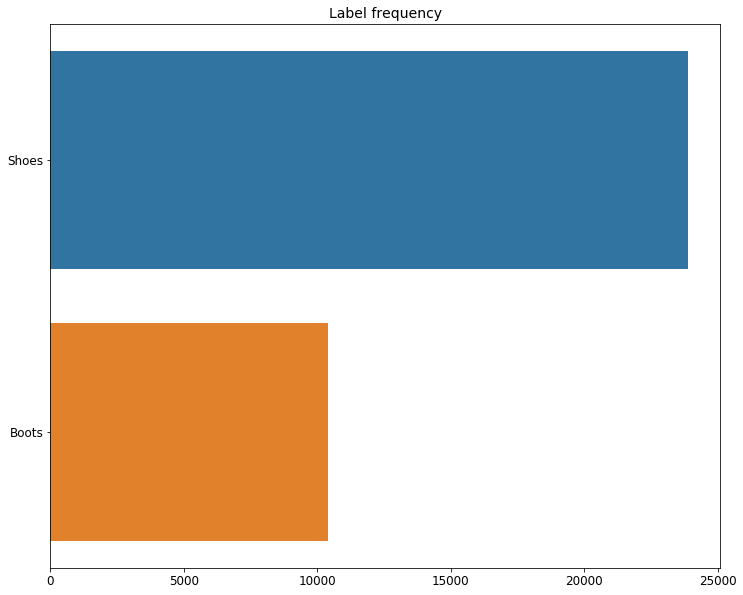

In [9]:
# load pandas dataframe and plot... 


# Get label frequencies in descending order
label_freq = df['Category'].value_counts().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.index)
plt.title("Label frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# !wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images-square.zip!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-data.zip
# !unzip ut-zap50k-images-square.zip
# !unzip ut-zap50k-data.zip

#Importing the required libraries


#import numpy as np
from tensorflow.python.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam



from keras.utils import np_utils

# from keras.preprocessing import image
# from keras.applications.vgg16 import VGG16, preprocess_input
#from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# from keras.applications import imagenet_utils
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools


import seaborn as sns

import io
from PIL import Image
import numpy as np
import h5py
from keras.models import model_from_json
from glob import glob


def load_model(folder_path):
    # load json and create model
    json_file = open("{}/model.json".format(folder_path), 'r')
    model_json = json_file.read()
    json_file.close()
    model = model_from_json(model_json)
    # load weights into new model
    model.load_weights("{}/model.h5".format(folder_path))
    print("Loaded model from disk")
    return model


def save_model(model, folder_path):
    # serialize model to JSON
    model_json = model.to_json()
    with open("{}/model.json".format(folder_path), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("{}/model.h5".format(folder_path))
    print("Saved model to disk")


def load_image(filepath, scale=True):
    images = np.array(Image.open(filepath), dtype=int)
    if scale:
        images = 2 * (images / 255.0) - 1
        images = images.astype(float)
    return images


def iterate_minibatches(glob_str, batch_size=128, img_size=256):
    filepaths = glob(glob_str)
    n_files = len(filepaths)
    cur_batch = 0
    while True:
        # drop last if it does not fit
        if (n_files - cur_batch*batch_size) < batch_size or cur_batch == 0:
            ids = np.random.randint(0, n_files, n_files)
            np.random.shuffle(ids)
            cur_batch = 0

        train_data = []
        for i in range(batch_size):
            image_ab = load_image(filepaths[ids[cur_batch*batch_size+i]])
            train_data.append([image_ab[:, :img_size], image_ab[:, img_size:]])

        cur_batch = (cur_batch + 1) % int(len(filepaths)/batch_size)

        train_data = np.array(train_data)
        yield train_data, cur_batch



from sklearn.neighbors import NearestNeighbors

database = df
size_filter_frame = database.shape[0]
num_neighs = 10


features = database['image_features_x']
features[10]

query_features = (features[10])

#Fit Nearest Neighbor Model
database_features = np.vstack(database['image_features_x'])

neighs = NearestNeighbors(n_neighbors=num_neighs) 
neighs.fit(database_features)

print(query_features.shape)
query2 =query_features.reshape(1,-1)
print(query2.shape)

distance, nn_index = neighs.kneighbors(query_features.reshape(1,-1), return_distance=True)
    
    

nn_index
nn_index.tolist()[0]

#Get nearest neighbor subset
neighbors = 
neighbor_pd = []
neighbor_pd = df.iloc[0]
for row in range(1,10): 
    neighbor_pd.concat(df.iloc[row])

    

neighbor_pd = database.iloc[nn_index.tolist()[0]]
neighbor_pd.shape

    
size_filter_frame = database.shape[0]
num_neighs = min(num_neighs, size_filter_frame)

#Fit Nearest Neighbor Model
database_features = np.vstack(df['image_features'])
neighs = NearestNeighbors(n_neighbors=num_neighs+1) #add plus one in case image exists in database
neighs.fit(database_features)
distance, nn_index = neighs.kneighbors(query_features, return_distance=True)

    #Check to see if image is already in dabase and remove (see if distance == 0)
    #If True, remove n = 0, and take n+1 neighbor
    if remove_dup: 
        updated_nn_index = []
        for i,row in enumerate(distance):
            image_exists = len(nn_index[i, row!=0]) == num_neighs
            if image_exists: 
                new_in= nn_index[i,1:num_neighs+1]
            else: 
                new_in = nn_index[i,0:num_neighs]
        
            updated_nn_index.append(new_in)
    
        nn_index = np.array(updated_nn_index)
    
    #Get pandas dataframes
    panda_list = []
    for row in nn_index: 
        panda_list.append(price_filter_df.iloc[row])
    
    #Get nearest neighbor result urls 
    url_matrix = []
    for row in nn_index: 
        url_row = price_filter_df['image_url'].values[row]
        url_matrix.append(url_row)
    
    url_matrix = np.array(url_matrix)

    #concat query image array to result arrays 
    images_urls = np.concatenate([query_image, url_matrix], axis = 1)

    if fig_plot: 
        get_fig_plots(images_urls)

    return(nn_index, images_urls, panda_list)  

pwidth = 224
pheight = 224 #


## train and test generator
#train_gen, val_gen = train_val_generator(batch_size, train_path, test_path)

# #from utils import train_val_generator
data_path = './data/'       # path of the data
train_path = './train'      
test_path = './test'        

TARGET_SZ = 224

input_shape = (TARGET_SZ,TARGET_SZ,3) #(img_width,i mg_height,img_channel)')
#batch_size = 32

cnn_model = MobileNetV2(weights = 'imagenet', 
                            include_top = False, 
                            input_shape = input_shape, 
                            pooling = 'avg')

model_name = 'MobileNetV2'
# with graph.as_default():
#     img_features = network_model.predict(img_vector)
cnn_model.summary()

df.loc[:,['Category.Boots','Category.Sandals','Category.Shoes','Category.Slippers']]



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

#Start assessing models. Try a family of models to identify the best performers 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
%matplotlib inline
#from tqdm import tqdm_notebook
import os
from glob import glob
from os.path import isdir,abspath,join
from os import listdir


#import numpy as np
from tensorflow.python.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam


In [ ]:

from keras.utils import np_utils

# from keras.preprocessing import image
# from keras.applications.vgg16 import VGG16, preprocess_input
#from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# from keras.applications import imagenet_utils
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools


import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [ ]:
from datetime import datetime
today = datetime.today()


df_filename = './summary_Jan-29-2020.pkl'
#df = pd.read_pickle(df_filename)


In [ ]:
#os.getcwd()
os.chdir('sneaks')

In [ ]:
df.columns

In [ ]:
json_summary_file = f'./summary_Jan-29-2020.json'
#df = pd.read_json(json_summary_file)

summary_file ='summary_withFeatures_Jan-29-2020.pkl'
#
df = pd.read_pickle(summary_file)

In [ ]:
db_base = '/home/ergonyc/Projects/Insight/UTzappos50k/sneaks'
database_path = db_base + '/'+ 'summary_Jan-29-2020_processed.json'
database_json = json.load(open(database_path))
database_df = pd.DataFrame(database_json)

#df2= df.rename(columns={'image_features':'image_features_y'})

# COMBINE meta_data and categories.  then iterate over all files to get vector

#df['image_features']=df['image_features_x'].copy()  # freaking renaming didn't work!!

In [ ]:
database_df.columns

In [ ]:
    
from sklearn.neighbors import NearestNeighbors

database = df
size_filter_frame = database.shape[0]
num_neighs = 10


features = database['image_features_x']
features[10]

In [ ]:
query_features = (features[10])

#Fit Nearest Neighbor Model
database_features = np.vstack(database['image_features_x'])

neighs = NearestNeighbors(n_neighbors=num_neighs) 
neighs.fit(database_features)

In [ ]:
print(query_features.shape)
query2 =query_features.reshape(1,-1)
print(query2.shape)

In [ ]:
distance, nn_index = neighs.kneighbors(query_features.reshape(1,-1), return_distance=True)
    
    

In [ ]:
nn_index
nn_index.tolist()[0]

In [ ]:
#Get nearest neighbor subset
neighbors = 
neighbor_pd = []
neighbor_pd = df.iloc[0]
for row in range(1,10): 
    neighbor_pd.concat(df.iloc[row])

    

In [ ]:
neighbor_pd = database.iloc[nn_index.tolist()[0]]
neighbor_pd.shape

In [ ]:
    
size_filter_frame = database.shape[0]
num_neighs = min(num_neighs, size_filter_frame)

#Fit Nearest Neighbor Model
database_features = np.vstack(df['image_features'])
neighs = NearestNeighbors(n_neighbors=num_neighs+1) #add plus one in case image exists in database
neighs.fit(database_features)
distance, nn_index = neighs.kneighbors(query_features, return_distance=True)

    #Check to see if image is already in dabase and remove (see if distance == 0)
    #If True, remove n = 0, and take n+1 neighbor
    if remove_dup: 
        updated_nn_index = []
        for i,row in enumerate(distance):
            image_exists = len(nn_index[i, row!=0]) == num_neighs
            if image_exists: 
                new_in= nn_index[i,1:num_neighs+1]
            else: 
                new_in = nn_index[i,0:num_neighs]
        
            updated_nn_index.append(new_in)
    
        nn_index = np.array(updated_nn_index)
    
    #Get pandas dataframes
    panda_list = []
    for row in nn_index: 
        panda_list.append(price_filter_df.iloc[row])
    
    #Get nearest neighbor result urls 
    url_matrix = []
    for row in nn_index: 
        url_row = price_filter_df['image_url'].values[row]
        url_matrix.append(url_row)
    
    url_matrix = np.array(url_matrix)

    #concat query image array to result arrays 
    images_urls = np.concatenate([query_image, url_matrix], axis = 1)

    if fig_plot: 
        get_fig_plots(images_urls)

    return(nn_index, images_urls, panda_list)  

In [ ]:
pwidth = 224
pheight = 224 #


In [ ]:
## train and test generator
#train_gen, val_gen = train_val_generator(batch_size, train_path, test_path)

In [ ]:
# #from utils import train_val_generator
data_path = './data/' # path of the data
train_path = './train'
test_path = './test'

TARGET_SZ = 224

input_shape = (TARGET_SZ,TARGET_SZ,3) #(img_width,i mg_height,img_channel)')
#batch_size = 32

cnn_model = MobileNetV2(weights = 'imagenet', 
                            include_top = False, 
                            input_shape = input_shape, 
                            pooling = 'avg')

model_name = 'MobileNetV2'
# with graph.as_default():
#     img_features = network_model.predict(img_vector)
cnn_model.summary()

In [ ]:
df.loc[:,['Category.Boots','Category.Sandals','Category.Shoes','Category.Slippers']]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

#Start assessing models. Try a family of models to identify the best performers 



# BINARY ENCODER

In [ ]:
# BINARY ENCODER Shoes or Not

# start by predicting shoes versus "other"
labels = pd.DataFrame(df['Category.Shoes'])

#Combine Data, get test/train split 
image_features = pd.DataFrame((df['image_features']))

X_train_pd, X_test_pd, Y_train_pd, Y_test_pd = train_test_split(image_features, 
                                                                labels, 
                                                                test_size = 0.3, 
                                                                random_state = 0)

In [ ]:
X_train = np.vstack(X_train_pd['image_features'])
X_test  = np.vstack(X_test_pd['image_features'])
Y_train = Y_train_pd.values.flatten()
Y_test  = Y_test_pd.values.flatten()

In [ ]:
#Instantiate diffent classifier types
clf_logit = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter = 1200)
ridge_model = RidgeClassifier(max_iter = 1000)

neighbors = [1,3,5]
knn_models = [KNeighborsClassifier(n_neighbors=num) for num in neighbors]

n_estimators = [10,100,500]
forest_model = RandomForestClassifier(n_estimators=500, )

models = [clf_logit, ridge_model, knn_models[0], knn_models[1], knn_models[2], forest_model]
model_names = ['logistic','ridge', 'knn_1', 'knn_3', 'knn_5', 'forest_model']


#Determine Model Scores
avg_scores = []
std_scores = []
for clf, name in zip(models, model_names): 
    print('training: ', name, ' model')
    scores = cross_val_score(clf, X_train, Y_train, cv = 5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))
    
   

In [ ]:
print(avg_scores)
print(std_scores)
 

In [ ]:
#Plot Model Results 
plt.bar(model_names, avg_scores,yerr = std_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.savefig('Classifier_Comparison.png')

In [ ]:
#Fine tune Log model
import math
alpha = [0.1, 1,10]
log_avg = []
log_std = []
for a in alpha: 
    print('log model with C =', a)
    clf_log = LogisticRegression(C=a, multi_class='ovr', solver='lbfgs', max_iter=2000)
    scores_ridge = cross_val_score(clf_log, X_train, Y_train, cv = 5)
    log_avg.append(np.mean(scores_ridge))
    log_std.append(np.std(scores_ridge))

print(log_avg)
print(log_std)


#Plot Model Results 
plt.bar(alpha, log_avg,yerr = log_std)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.savefig('Classifier_Comparison.png')

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


#Display Confusion Matrix
X_test = np.vstack(X_test_pd['image_features'])

clf_log = LogisticRegression(C = 1, multi_class='ovr', max_iter=2000, solver='lbfgs')
clf_log.fit(X_train, Y_train)
log_score = clf_log.score(X_test, Y_test)
log_ypred = clf_log.predict(X_test)
log_confusion_matrix = confusion_matrix(Y_test, log_ypred)
print(log_confusion_matrix)

heatmap(log_confusion_matrix, annot=True, linewidths=0.5, cmap='Blues')
plt.savefig('log_Matrix.png')

In [ ]:
import random

#See where classifiers are messing up 
panda_ints = Y_test_pd.index.values
class_labels = [0,1]

performance_matrix = []
for row in class_labels: 
    bool_truth = (Y_test == row) 
    for column in class_labels: 
        bool_pred = (log_ypred==column)
        performance_logical = np.logical_and(bool_truth, bool_pred)
        performance_ints = panda_ints[performance_logical==True]
        performance_matrix.append(performance_ints)
        
for num, entry in enumerate(performance_matrix): 
    plt.subplot(2,2,num +1)
    rand_int = random.randint(0,len(entry)-1)
    index = entry[rand_int]
    path = data_path+df['path'][index]
    img_data = image.load_img(path, target_size=(224, 224))
    plt.axis('off')
    plt.imshow(img_data);    
    

In [ ]:
from sklearn.externals import joblib

#Save Trained model to disk
filename = f'log_model_{today:%b-%d-%Y}.sav'
joblib.dump(clf_log, filename)







# CATEGORICAL LOGISTIC REGRESSION

In [ ]:
##### now do the test in 4 categories

labels = df.loc[:,['Category.Boots','Category.Sandals','Category.Shoes','Category.Slippers']]

X_train_pd, X_test_pd, Y_train_pd, Y_test_pd = train_test_split(image_features, 
                                                                labels, 
                                                                test_size = 0.3, 
                                                                random_state = 0)

In [ ]:
Y_train_pd.values

X_train = np.vstack(X_train_pd['image_features'])
X_test  = np.vstack(X_test_pd['image_features'])
Y_train = Y_train_pd.values.flatten()
Y_test  = Y_test_pd.values.flatten()

In [ ]:
#Instantiate diffent classifier types
clf_logit = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter = 1000)
ridge_model = RidgeClassifier(max_iter = 1000)

neighbors = [1,3,5]
knn_models = [KNeighborsClassifier(n_neighbors=num) for num in neighbors]

n_estimators = [10,100,500]
forest_model = RandomForestClassifier(n_estimators=500, )

models = [clf_logit, ridge_model, knn_models[0], knn_models[1], knn_models[2], forest_model]
model_names = ['logistic','ridge', 'knn_1', 'knn_3', 'knn_5', 'forest_model']

In [ ]:
#Determine Model Scores
avg_scores = []
std_scores = []
for clf, name in zip(models, model_names): 
    print('training: ', name, ' model')
    scores = cross_val_score(clf, X_train, Y_train, cv = 5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))
    
   

In [ ]:
print(avg_scores)
print(std_scores)
 

#Plot Model Results 
plt.bar(model_names, avg_scores,yerr = std_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.savefig('Classifier_Comparison.png')

#Fine tune Log model
import math
alpha = [0.1, 1,10]
log_avg = []
log_std = []
for a in alpha: 
    print('log model with C =', a)
    clf_log = LogisticRegression(C=a, multi_class='ovr', solver='lbfgs', max_iter=2000)
    scores_ridge = cross_val_score(clf_log, X_train, Y_train, cv = 5)
    log_avg.append(np.mean(scores_ridge))
    log_std.append(np.std(scores_ridge))

print(log_avg)
print(log_std)


from sklearn.metrics import confusion_matrix
from seaborn import heatmap


#Display Confusion Matrix
X_test = np.vstack(X_test_pd['image_features'])

clf_log = LogisticRegression(C = 1, multi_class='ovr', max_iter=2000, solver='lbfgs')
clf_log.fit(X_train, Y_train)
log_score = clf_log.score(X_test, Y_test)
log_ypred = clf_log.predict(X_test)
log_confusion_matrix = confusion_matrix(Y_test, log_ypred)
print(log_confusion_matrix)

heatmap(log_confusion_matrix, annot=True, linewidths=0.5, cmap='Blues')
plt.savefig('log_Matrix.png')

import random

#See where classifiers are messing up 
panda_ints = Y_test_pd.index.values
class_labels = [0,1,2]

performance_matrix = []
for row in class_labels: 
    bool_truth = (Y_test == row) 
    for column in class_labels: 
        bool_pred = (log_ypred==column)
        performance_logical = np.logical_and(bool_truth, bool_pred)
        performance_ints = panda_ints[performance_logical==True]
        performance_matrix.append(performance_ints)
        
for num, entry in enumerate(performance_matrix): 
    plt.subplot(3,3,num +1)
    rand_int = random.randint(0,len(entry)-1)
    index = entry[rand_int]
    path = all_dataframes['image_file_path'][index]
    img_data = image.load_img(path, target_size=(224, 224))
    plt.axis('off')
    plt.imshow(img_data);    
    

from sklearn.externals import joblib

#Save Trained model to disk
filename = f'log_model_{today:%d-%d-%2190621.sav'
joblib.dump(clf_log, filename)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
from PIL import Image
import requests
from io import BytesIO

def nearest_neighbor_image_finder(query_image, query_features, num_neighs, database, fig_plot): 
    ''' function to return nearest neighbors for a query
    
    Args: 
        query_image (image): image 
        query_features (array): numpy array of extracted image features
        num_neighs (int): number of neighbors to return 
        datbase(df): pandas dataframe containing image database
        fig_plot (bool): boolean to indicate of plotting is desired (1 for yes)
        #min_price (float): minimum budget
        #max_price (float): max budget
        #remove_dup (bool): remove image from database if it exists
    
    return: 
        nn_results (arr): indices of nearest_neighbor lookup
        images_urls (arr): array of image urls for query and nearest neighbors sorted in nearest neighbor order
        pandas_list (pd): pandas dataframe containing all relevant information of neighbors 
    '''
    
    remove_dup = True
    
    #logic here in case the n exceeds number of items in database
    size_filter_frame = database.shape[0]
    num_neighs = min(num_neighs, size_filter_frame)
    
    #Fit Nearest Neighbor Model
    database_features = np.vstack(database['image_features'])
    neighs = NearestNeighbors(n_neighbors=num_neighs+1) #add plus one in case image exists in database
    neighs.fit(database_features)
    distance, nn_index = neighs.kneighbors(query_features, return_distance=True)
    
    #Check to see if image is already in dabase and remove (see if distance == 0)
    #If True, remove n = 0, and take n+1 neighbor
    if remove_dup: 
        updated_nn_index = []
        for i,row in enumerate(distance):
            image_exists = len(nn_index[i, row!=0]) == num_neighs
            if image_exists: 
                new_in= nn_index[i,1:num_neighs+1]
            else: 
                new_in = nn_index[i,0:num_neighs]
        
            updated_nn_index.append(new_in)
    
        nn_index = np.array(updated_nn_index)
    
    #Get pandas dataframes
    panda_list = []
    for row in nn_index: 
        panda_list.append(price_filter_df.iloc[row])
    
    #Get nearest neighbor result urls 
    url_matrix = []
    for row in nn_index: 
        url_row = price_filter_df['image_url'].values[row]
        url_matrix.append(url_row)
    
    url_matrix = np.array(url_matrix)

    #concat query image array to result arrays 
    images_urls = np.concatenate([query_image, url_matrix], axis = 1)

    if fig_plot: 
        get_fig_plots(images_urls)

    return(nn_index, images_urls, panda_list)  
            
def get_fig_plots(image_urls):
    ''' function to plot matrix of image urls. 
        image_urls[:,0] should be the query image
        
    Args: 
        image_urls: matrix of image urls
    
    return: 
        null
        saves image file to directory
    '''
    nrow = image_urls.shape[0]
    ncol = image_urls.shape[1]
    flat_urls = image_urls.flatten()

    fig = plt.figure(figsize = (20, 20))

    for num,url in enumerate(flat_urls):
    
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.resize((224,224), Image.ANTIALIAS)
        plt.subplot(nrow, ncol, num+1)
        plt.axis('off')
        plt.imshow(img);

        if num == 0: 
            plt.title('Query')
    
        if 0<num <ncol: 
            plt.title('Neighbor ' + str(num))
        
    plt.savefig('image_search.png')
        
    
            
#Test Nearest Neighbor lookup with random selection from database, plot results 
n_queries = 1
query_inds = []
random.seed(150)
[query_inds.append(random.randint(i,12000)) for i in range(n_queries)]

query_features = np.vstack(image_df['image_features'][query_inds])
query_url = np.array(image_df['image_url'][query_inds]).reshape(n_queries,1)
num_neigs = 5
fig_plot = 1
indices, urls, subset_pd = nearest_neighbor_image_finder(query_url, query_features, num_neighs, image_df,fig_plot)

In [ ]:
### NOW A FEW THINGS
# train the model to "classify" (for validation)
# use the pre-trained model to look at how the features are distributed in space from MobileNetV2

print(tr_model.summary())

In [ ]:
# model saving
checkpoint = ModelCheckpoint(model_name+'.h5',monitor='val_acc',verbose=1,save_best_only=True)
early_stop = EarlyStopping(monitor='val_acc',min_delta=0,patience=10,verbose=1,mode='auto')

# Compile the model
#adam = Adam()
tr_model.compile(loss='categorical_crossentropy', optimizer = "nadam" ,metrics=['accuracy'])

In [ ]:
# train the model
history = tr_model.fit_generator(
                train_gen,
                steps_per_epoch=1000,
                epochs=30,
                validation_data = val_gen,
                validation_steps = 250,
                callbacks = [checkpoint, early_stop] )

In [ ]:
# plot the results
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.savefig(args.model_name+'.jpg')
#plt.show()

In [ ]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]


def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()


def plot_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    
    
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label



test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])

test_set_raw = tfds.load("tf_flowers", split=test_split, as_supervised=True)
valid_set_raw = tfds.load("tf_flowers", split=valid_split, as_supervised=True)
train_set_raw = tfds.load("tf_flowers", split=train_split, as_supervised=True)



In [ ]:

train_df = pandas.read_csv("./train.csv")
valid_df = pandas.read_csv("./valid.csv")

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='data/train',
        x_col="filename",
        y_col="class",
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory='data/validation',
        x_col="filename",
        y_col="class",
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)


In [ ]:
data_folderpath = df_clean.path
#files = data_folderpath.to_list()
filepaths = data_folderpath.to_list()
len(filepaths)

In [ ]:
#filepaths = glob(glob_str)
batch_size = 1024
img_size = 224
n_files = len(filepaths)
cur_batch = 0

In [ ]:
while True:
    # drop last if it does not fit
    if (n_files - cur_batch*batch_size) < batch_size or cur_batch == 0:
        ids = np.random.randint(0, n_files, n_files)
        np.random.shuffle(ids)
        cur_batch = 0
    train_data = []
    for i in range(batch_size):
        image_ab = load_image(filepaths[ids[cur_batch*batch_size+i]])
        train_data.append([image_ab[:, :img_size], image_ab[:, img_size:]])

    cur_batch = (cur_batch + 1) % int(len(filepaths)/batch_size)

    train_data = np.array(train_data)
#    yield train_data, cur_batch



#data=ImageDataBunch.from_df(path="ut-zap50k-images-square/",df=df_clean, size=224,bs=64)

In [ ]:
data_folderpath = df_clean.path

files = data_folderpath.to_list()

In [ ]:
print(files[0:5])

In [ ]:
data_iterator = create_minibatches(data_folderpath.to_list, 128, 224)
#        data_folderpath + "/train/*.jpg", batch_size, image_size)

In [ ]:
#val_data_iterator = iterate_minibatches(
#         data_folderpath + "/val/*.jpg", n_checkpoint_samples, image_size)


img_ab_fixed, _ = next(data_iterator)
    

In [ ]:
data_iterator


#al_data_iterator = iterate_minibatches(data_folderpath + "/val/*.jpg", n_checkpoint_samples, image_size)

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
import numpy as np
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications import imagenet_utils

global pwidth
global pheight
global network_model

pwidth = 224
pheight = 224
    
global graph 
graph = tf.get_default_graph()
network_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (pwidth,pheight,3),pooling = 'avg')




img_data = image.load_img(img_path, target_size=(pwidth, pheight))
img_vector = image.img_to_array(img_data)
img_vector = np.expand_dims(img_vector, axis=0)
img_vector = preprocess_input(img_vector) #Problem here, must be convention of keras to pass by reference?
img_vector = imagenet_utils.preprocess_input(img_vector)


In [ ]:
img_features = network_model.predict(img_vector)

#Get pandas df of n clo
nn_index, neighbors_df = nearest_neighbor_image_finder(img_features, 100, database_df,0,100,100)
neighbors = neighbors_df


In [ ]:
def nearest_neighbor_image_finder(query_features, num_neighs, database, price_filt, min_price, max_price,): 
    ''' function to return nearest neighbors for a query
    
    Args: 
        query_features (array): numpy array of extracted image features
        num_neighs (int): number of neighbors to return 
        datbase(df): pandas dataframe containing image database
        fig_plot (bool): boolean to indicate of plotting is desired (1 for yes)
        min_price (float): minimum budget
        max_price (float): max budget
        remove_dup (bool): remove image from database if it exists
    
    return: 
        nn_results: indices of nearest_neighbor lookup
        neighbor_pd: pandas dataframe subsetted on returned values from knn search
    '''
    #########################################
    ''' i don't actually want nearest neighbors.... maybe an average or latent images and the text.
        should return text.
    '''
    # #############################################
    #Filter Database based on given price range
    if price_filt:
        database  = database[(database['price']< max_price) & (database['price']> min_price)]
    
    #logic here in case the n exceeds number of items in database
    size_filter_frame = database.shape[0]
    num_neighs = min(num_neighs, size_filter_frame)
    
    #Fit Nearest Neighbor Model
    database_features = np.vstack(database['image_features'])
    neighs = NearestNeighbors(n_neighbors=num_neighs) 
    neighs.fit(database_features)
    distance, nn_index = neighs.kneighbors(query_features, return_distance=True)

    #Get nearest neighbor subset
    neighbor_pd = []
    for row in nn_index: 
        neighbor_pd.append(database.iloc[row])


In [ ]:
# data_iterator = iterate_minibatches(data
#         data_folderpath + "/train/*.jpg", batch_size, image_size)
# val_data_iterator = iterate_minibatches(
#         data_folderpath + "/val/*.jpg", n_checkpoint_samples, image_size)

img_ab_fixed, _ = next(val_data_iterator)
# img_a_fixed, img_b_fixed = img_ab_fixed[:, 0], img_ab_fixed[:, 1]




    ones = np.ones((batch_size, ) + disc_patch, dtype=np.float32)
    zeros = np.zeros((batch_size, ) + disc_patch, dtype=np.float32)
    dummy = zeros

    for i in range(n_iterations):
        D.trainable = True
        G.trainable = False

        image_ab_batch, _ = next(data_iterator)
        loss_d = D_model.train_on_batch(
            [image_ab_batch[:, 0], image_ab_batch[:, 1]],
            [ones, zeros])

        D.trainable = False
        G.trainable = True
        image_ab_batch, _ = next(data_iterator)
        loss_g = G_model.train_on_batch(
            [image_ab_batch[:, 0], image_ab_batch[:, 1]],
            [ones, dummy])

        print("iter", i)
        if (i % iters_per_checkpoint) == 0:
            G.trainable = False
            fake_image = G.predict(img_a_fixed)
            log_images(fake_image, 'val_fake', i, logger)
            save_model(G, out_dir)

        log_losses(loss_d, loss_g, i, logger)

        

# #n = 12856 images
# # images are "path"

# # now need to split into test train for sci-kit learn

# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y, test_size=0.33, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)






In [ ]:


seed = 7
numpy.random.seed(seed)

dataframe = df_clean #pandas.read_csv("INPUTFILE.csv", skiprows=range(0, 0))

dataset = dataframe.values

In [ ]:
X = dataset[:,0:50].astype(float) # number of cols-1
Y = dataset[:,50]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

encoded_Y = np_utils.to_categorical(encoded_Y)
print("encoded_Y=", encoded_Y) 
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))

    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binayr classification
        #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # for multi class
    return model


model=create_baseline();
history=model.fit(X, encoded_Y, batch_size=50, nb_epoch=500, validation_split = 0.2, verbose=1)

print(history.history.keys())
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


pre_cls=model.predict_classes(X)    
cm1 = confusion_matrix(encoder.transform(Y),pre_cls)
print('Confusion Matrix : \n')
print(cm1)


score, acc = model.evaluate(X,encoded_Y)
print('Test score:', score)
print('Test accuracy:', acc)